In [44]:
import pymongo
from pymongo import MongoClient
import pprint
import matplotlib.pyplot as plt

In [45]:
def lineplotCI(y_mean, y_low, y_high, x_label = None, y_label = None, title = None):
    # Create the plot object
    _, ax = plt.subplots()

    
    #just assume we have a time series
    x_data = [i for i in range(len(y_mean))]
    
    # Plot the data, set the linewidth, color and transparency of the
    # line, provide a label for the legend
    ax.plot(y_mean, lw = 1, color = '#539caf', alpha = 1)
    # Shade the confidence interval
    ax.fill_between(x_data, y_low, y_high, color = '#539caf', alpha = 0.4)
    # Label the axes and provide a title
    
    if title:
        ax.set_title(title)
    
    if x_label:
        ax.set_xlabel(x_label)

    if y_label:
        ax.set_ylabel(y_label)

In [58]:
client = MongoClient()
db = client['deep_learning']
cursor = db.inventory.find({})
metrics =db.get_collection('metrics')
metrics.find()[450]

{'_id': ObjectId('5c4f8eed287e3e54b84f27b7'),
 'epoch_idx': 451,
 'frames': 923648,
 'fps': 503,
 'PMM:episode_rewards': 1589.2686506700002,
 'P09:episode_rewards': 2354.1559539,
 'P01:episode_rewards': 945.7061022,
 'episode_length': 423.13,
 'policy_loss': -0.017456536131430767,
 'value_loss': 0.0031657241361244814,
 'policy_entropy': 2.8825813509523868,
 'approx_kl_divergence': 0.005007680787561736,
 'clip_fraction': 0.0578125,
 'grad_norm': 5.913724858794394,
 'advantage_norm': 7.937253135442734,
 'explained_variance': 0.9928741712123156,
 'model_name': 'walker_ppo',
 'run_name': 'walker_ppo/0'}

In [47]:
p09_reward = []
pmm_reward = []
p01_reward = []

for post in metrics.find():
    p09_reward.append(post['P09:episode_rewards'])
    pmm_reward.append(post['PMM:episode_rewards'])
    p01_reward.append(post['P01:episode_rewards'])

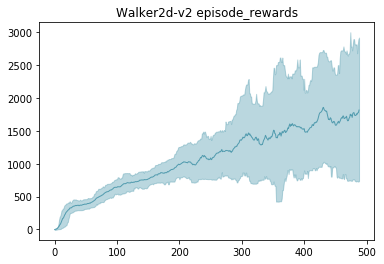

In [59]:
lineplotCI(y_mean = pmm_reward, y_low = p01_reward, y_high  = p09_reward, title = 'Walker2d-v2 episode_rewards')

['metrics', 'configs']